# EDA Oso Trava

@roman

8 sep 2023

In [19]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Read Data

In [225]:
# read from parquets
df_playlist = pd.read_parquet('../../data/scrap_oso_trava/channel_playlists.parquet')
df_videos_urls = pd.read_parquet('../../data/scrap_oso_trava/playlist_videos.parquet')
df_videos_stats = pd.read_parquet('../../data/scrap_oso_trava/videos_stats.parquet')
df_videos_transcripts = pd.read_parquet('../../data/scrap_oso_trava/videos_transcript.parquet')

In [17]:
df_playlist.head()

,id,title,description,published_at,video_count,channel_id,photo_url
0,PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN,CRACKS PODCAST,El mejor podcast de negocios en hablahispana. ...,2023-06-26T03:11:15Z,9,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/fL9FNpuGK_8/maxresdefau...
1,PL5EDqo-XIoDD76lHHkap8VJYUrFbOIJTj,VENTADE EMPRESA/SUCESION,,2023-06-26T03:08:34Z,1,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/YOvk4LpPH8Q/maxresdefau...
2,PL5EDqo-XIoDA4p0_rvpzX64EWjceQtSaR,EVENTOS,,2023-06-19T13:10:57Z,2,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/U4xUJm44gbk/maxresdefau...
3,PL5EDqo-XIoDClYjCfhBvS8b9s75A2f-xm,QUIEBRA DE EMPRESA,,2023-06-12T13:00:24Z,2,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/IfIzcl3k55s/maxresdefau...
4,PL5EDqo-XIoDDtszidkbHpr02sCuqkz38s,Real Estate,,2023-05-29T13:11:05Z,1,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/TUQJEbHMXOA/maxresdefau...


In [13]:
df_videos_urls.head()

,id,title,description,published_at,playlist_id,channel_id,photo_url
0,fL9FNpuGK_8,"SUSO ZAMORA | Perder a TODA tu FAMILIA, lo que...",Suso Zamora es un inversionista peruano fundad...,2023-08-28T03:19:53Z,PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/fL9FNpuGK_8/maxresdefau...
1,uTS8L1kvjmY,"SEBASTIÁN KREIS | Lecciones de NICO SZEKASY, D...",Sebastian Kreis es Co-fundador y CEO de Xepeli...,2023-08-07T13:39:30Z,PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/uTS8L1kvjmY/maxresdefau...
2,027NOppIrVQ,"FERNANDO LANDEROS | El Infierno en México, SOU...",VUELVETE ANGEL DE FREEDOM EN ESTE LINK: 👉 http...,2023-07-24T12:22:59Z,PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/027NOppIrVQ/maxresdefau...
3,2u6FeKJ-biw,LUIS CERVANTES I La INVERSION PERFECTA #236,Luis Cervantes en LinkedIn como Luis Cervantes...,2023-07-17T13:23:16Z,PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/2u6FeKJ-biw/maxresdefau...
4,OGwMD9NMQMA,"UPDATE SHOW con Javier Morodo I Shark Tank, MA...",Javier es un inversionista mexicano fundador d...,2023-07-10T13:24:55Z,PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/OGwMD9NMQMA/maxresdefau...


In [14]:
df_videos_stats.head()

,id,tags,is_live,duration,view_count,like_count,dislike_count,favorite_count,comment_count
0,fL9FNpuGK_8,"[suso zamora cracks podcast, oso trava, cracks...",none,PT2H4M44S,182802,8486,NaN,0,746
1,uTS8L1kvjmY,"[sebastian kreis cracks podcast, sebastian kre...",none,PT1H38M44S,9669,198,NaN,0,16
2,027NOppIrVQ,"[chobi landeros, fernando landeros cracks podc...",none,PT1H38M35S,363888,11248,NaN,0,745
3,2u6FeKJ-biw,"[luis cervantes, luis cervantes cracks podcast...",none,PT1H32M50S,19170,455,NaN,0,45
4,OGwMD9NMQMA,"[javier morodo cracks podcast, javier martinez...",none,PT1H46M,15338,362,NaN,0,33


In [227]:
df_videos_transcripts

,timestamp,text,video_id
0,0:00,Nosotros le mentíamos como que se iba a salvar...,fL9FNpuGK_8
1,0:06,describir mi familia era una familia enferma n...,fL9FNpuGK_8
2,0:14,brazos meto a Yuli me voy le llamo al médico l...,fL9FNpuGK_8
3,0:20,impedirte a llorar entre eso soy osos y silenc...,fL9FNpuGK_8
4,0:26,cerebral más joven un cáncer peor pronóstico p...,fL9FNpuGK_8
...,...,...,...
193141,1:08:11,aprendiste algo de este episodio mencionan en ...,xWqhtRWCKHQ
193142,1:08:19,show que se escribe s h wv entonces otra vez w...,xWqhtRWCKHQ
193143,1:08:27,contacto puedes también encontrar links a todo...,xWqhtRWCKHQ
193144,1:08:32,diagonal william con doble l eso es todo por h...,xWqhtRWCKHQ


# EDA

## Playlists

In [15]:
# count number of playlists 
print('Number of playlists: ', len(df_playlist.id.unique()))

Number of playlists:  62


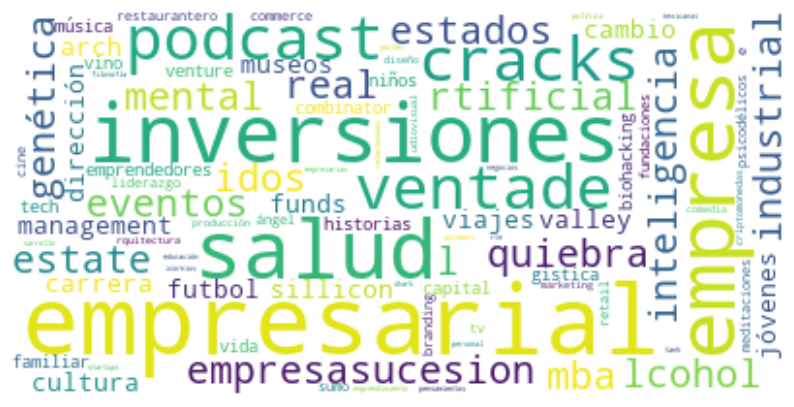

In [60]:
# create function to standarize words in titles for latin characters
def standarize_words(text):
    text = text.lower()
    # regex to get rid of punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # get rid of spanish stopwords
    text = re.sub(r'\b(de|la|que|el|en|y|a|los|del|se|las|por|un|para|con|no|una|su|al|lo|como|ms|pero|sus|le|ya)', '', text)
    return text

# generate a word cloud of the playlist titles
text = " ".join(standarize_words(playlist) for playlist in df_playlist.title)

# generate word cloud
wordcloud = WordCloud(
    max_font_size=50, max_words=100, background_color="white",
    colormap="viridis", normalize_plurals=True
    ).generate(text)

# plot word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

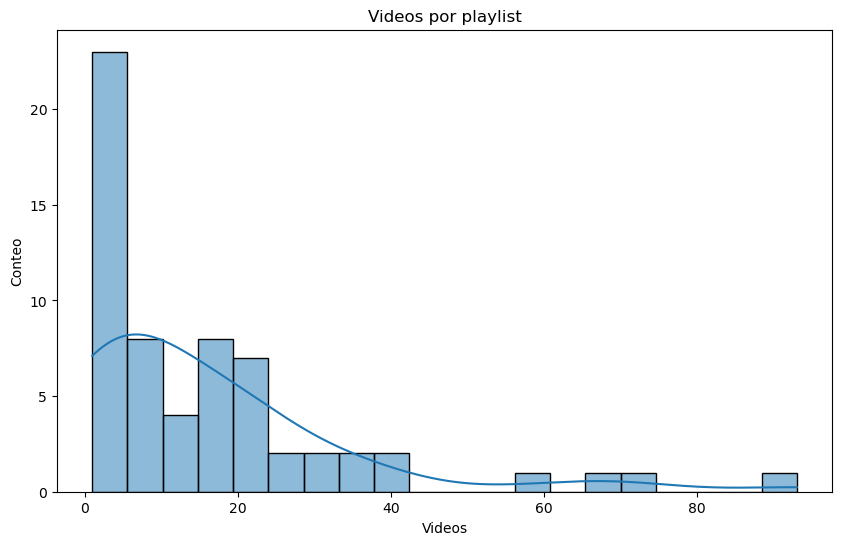

In [66]:
# histogram and kde plot of video_count 
# kde is an exponential distribution
plt.figure(figsize=(10,6))
sns.histplot(df_playlist.video_count, kde=True, bins=20)

# add title
plt.title('Videos por playlist')

# x label
plt.xlabel('Videos')

# y label 
plt.ylabel('Conteo')

plt.show()

/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabt

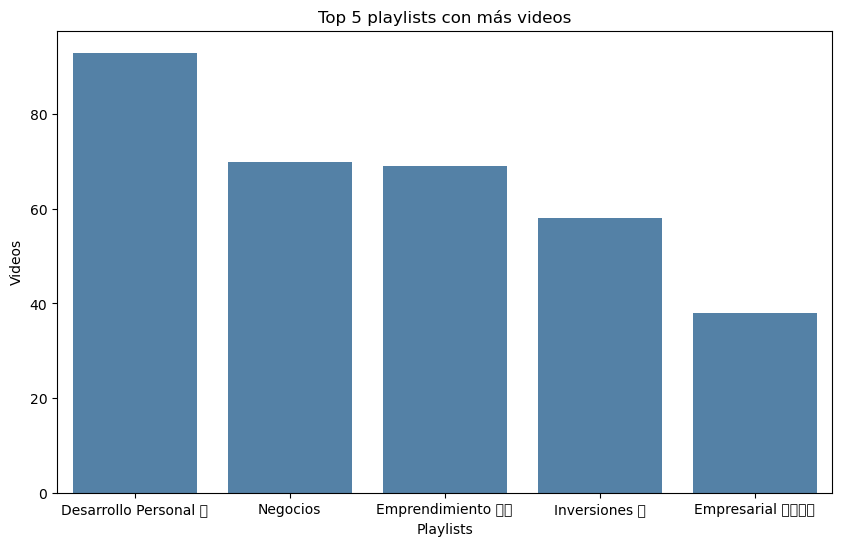

In [73]:
# col bars of the top 5 playlists with more videos
top_5_playlists = df_playlist.sort_values(by='video_count', ascending=False).head(5)

# plot
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'sans-serif'
sns.barplot(x='title', y='video_count', data=top_5_playlists, color='steelblue')

# add title
plt.title('Top 5 playlists con más videos')

# x label
plt.xlabel('Playlists')

# y label
plt.ylabel('Videos')

plt.show()

Text(0, 0.5, 'Playlists Publicadas')

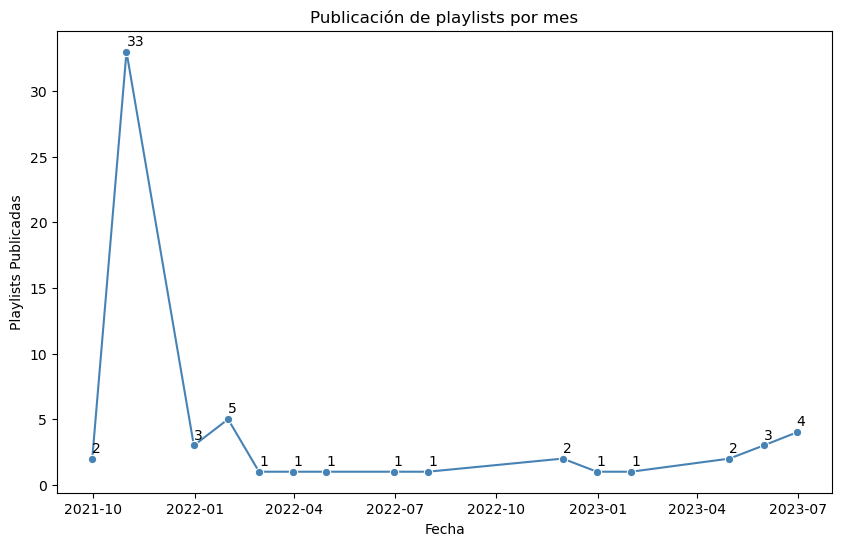

In [87]:
# time series of playlists publication
# convert to datetime
df_plot = df_playlist.copy()
df_plot["published_at"] = pd.to_datetime(df_plot["published_at"])

# set index
df_plot.set_index('published_at', inplace=True)

# resample by month
df_plot = df_plot.resample('M').count()

# drop rows with no playlists
df_plot = df_plot[df_plot.id > 0]

# subste after second month with at least one playlist
df_plot = df_plot.iloc[1:]

# plot time series
plt.figure(figsize=(10,6))
sns.lineplot(
    x=df_plot.index,
    y=df_plot.id,
    color='steelblue',
    # add also a scatterplot
    marker='o',
)
# add text to the plot
for x, y in zip(df_plot.index, df_plot.id):
    plt.text(x, y+0.5, str(y))

# add title
plt.title('Publicación de playlists por mes')

plt.xlabel("Fecha")
plt.ylabel("Playlists Publicadas")

# Videos

In [142]:
# get final table of videos
df_videos = (
    df_videos_urls.copy()
    .drop_duplicates(subset=['id'], ignore_index=True)
    .merge(df_videos_stats, on='id', how='left')
    .assign(
        # convert to datetime 'duration' with example format 'PT2H4M44S'
        mins_duration=lambda x: pd.to_timedelta(x['duration']).dt.total_seconds() / 60,
        # convert to datetime 'published_at'
        published_at=lambda x: pd.to_datetime(x['published_at']),
        # likes per view
        likes_per_view=lambda x: (x['like_count'].astype(float) / x['view_count'].astype(float)),
        # view counts
        view_count=lambda x: x['view_count'].astype(float),
    )
    .sort_values(by='published_at', ascending=True, ignore_index=True)
    # drop rows with title = 'Private video'
    .query('title != "Private video"')
    .reset_index(drop=True)
    .drop(columns=['duration', 'dislike_count', 'favorite_count', 'is_live'])
)
df_videos.head()

,id,title,description,published_at,playlist_id,channel_id,photo_url,tags,view_count,like_count,comment_count,mins_duration,likes_per_view
0,eGwzC6GAEvE,Convierte tu miedo en tu mayor ventaja,Con este simple truco llamado reapreciación de...,2019-12-27 17:17:51+00:00,PL5EDqo-XIoDCaAUZJ4tOFPX8OTq04QQmq,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/eGwzC6GAEvE/maxresdefau...,None,1572.0,74,1,1.933333,0.047074
1,QeGMG8W9pS4,"Jorge Combe. DD3 - El Metaverso, SPACS, Ayuno ...",Entrevista al emprendedor mexicano Jorge Combe...,2021-10-08 16:38:40+00:00,PL5EDqo-XIoDCKGXn7vN0k1BcZu_n3onzV,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/QeGMG8W9pS4/maxresdefau...,"[Negocios, Desarrollo inmobiliario, Inversione...",30742.0,821,70,135.866667,0.026706
2,GVOl6JoQlaE,Carlos García. KAVAK | Creando la Startup más ...,"Entrevista de Oso Trava con Carlos García, fun...",2021-10-08 16:40:33+00:00,PL5EDqo-XIoDBzHhLvj8YaqczvOKGzMw-K,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/GVOl6JoQlaE/maxresdefau...,"[oso trava, oso trava cracks, cracks podcast, ...",46464.0,863,45,117.933333,0.018574
3,nOtd8X2VZIQ,Diego Ruzzarin | Es de Sabios Cambiar de Opini...,"Entrevista con el polémico Diego Ruzzarin, hab...",2021-10-10 15:09:13+00:00,PL5EDqo-XIoDChxEzwJ8yBsV7H2zf1B1q3,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/nOtd8X2VZIQ/maxresdefau...,"[diego ruzzarin, diego ruzzarin podcast, diego...",131739.0,3697,348,110.983333,0.028063
4,CQMSq3WifmA,"Martha Debayle - Intuición, Dudas y Aceptar Qu...","Entrevista a Marta Debayle, la exitosa conduct...",2021-10-10 15:18:31+00:00,PL5EDqo-XIoDChxEzwJ8yBsV7H2zf1B1q3,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/CQMSq3WifmA/maxresdefau...,"[emprendedora, empresaria, Locutora, Conductor...",35814.0,771,54,66.350000,0.021528


In [255]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              220 non-null    object             
 1   title           220 non-null    object             
 2   description     220 non-null    object             
 3   published_at    220 non-null    datetime64[ns, UTC]
 4   playlist_id     220 non-null    object             
 5   channel_id      220 non-null    object             
 6   photo_url       218 non-null    object             
 7   tags            218 non-null    object             
 8   view_count      220 non-null    float64            
 9   like_count      220 non-null    object             
 10  comment_count   220 non-null    object             
 11  mins_duration   220 non-null    float64            
 12  likes_per_view  220 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(

In [139]:
# number of videos
print('Number of videos: ', len(df_videos.id.unique()))

Number of videos:  216


<Axes: xlabel='mins_duration', ylabel='Count'>

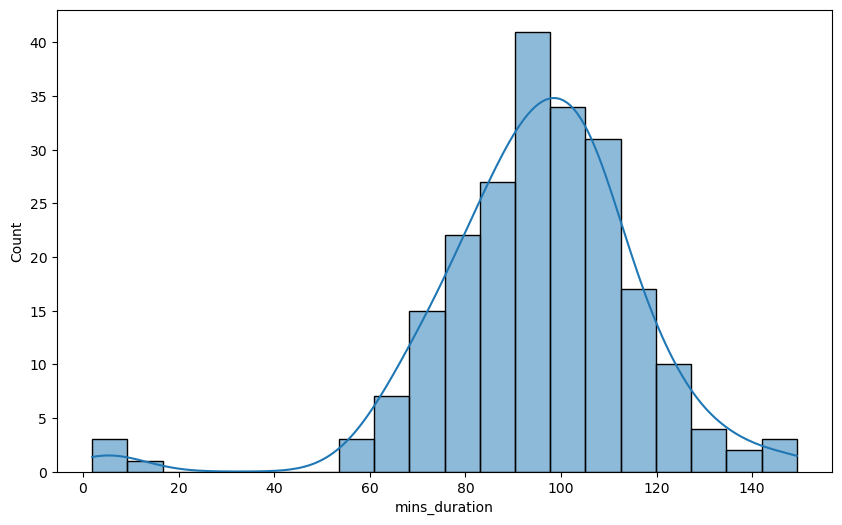

In [111]:
# distribution of mean duration
plt.figure(figsize=(10,6))
sns.histplot(df_videos.mins_duration, kde=True, bins=20)


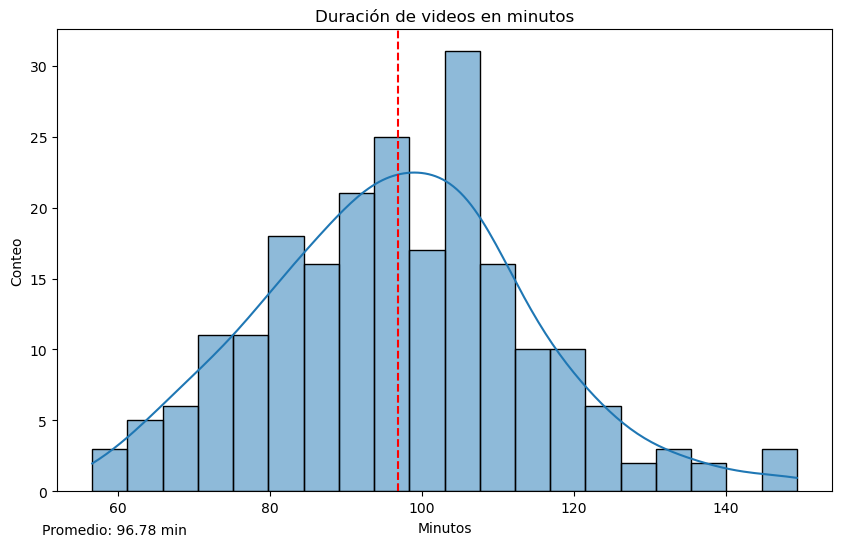

In [138]:
# look the videos with less duration
df_videos.sort_values(by='mins_duration', ascending=True).head(10)

# get rid of videos with less than 20 min duration
df_videos = df_videos[df_videos.mins_duration > 20]

# distribution of mean duration
plt.figure(figsize=(10,6))
sns.histplot(df_videos.mins_duration, kde=True, bins=20)

# add mean duration
mean_duration = df_videos.mins_duration.mean()
plt.axvline(mean_duration, color='red', linestyle='--')

# annotate mean duration bottom left
plt.annotate(
    'Promedio: {:.2f} min'.format(mean_duration),
    xy=(mean_duration, 10), xytext=(50, -3)
)

# add title
plt.title('Duración de videos en minutos')
plt.xlabel('Minutos')
plt.ylabel('Conteo')

plt.show()

In [280]:
# total minutes of videos
print('Total days of videos: ', df_videos.mins_duration.sum()/(60*24))

Total days of videos:  14.532638888888888


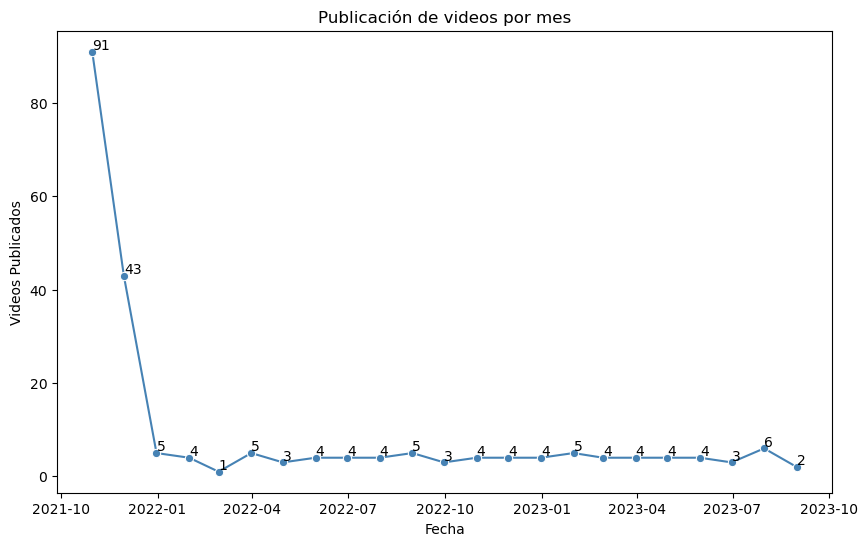

In [140]:
# published videos per month
# set index
df_plot = df_videos.copy()
df_plot.set_index('published_at', inplace=True)

# resample by month
df_plot = df_plot.resample('M').count()

# drop rows with no videos
df_plot = df_plot[df_plot.id > 0]

# plot time series
plt.figure(figsize=(10,6))
sns.lineplot(
    x=df_plot.index,
    y=df_plot.id,
    color='steelblue',
    # add also a scatterplot
    marker='o',
)
# add text to the plot
for x, y in zip(df_plot.index, df_plot.id):
    plt.text(x, y+0.5, str(y))

# add title
plt.title('Publicación de videos por mes')

plt.xlabel("Fecha")
plt.ylabel("Videos Publicados")

plt.show()

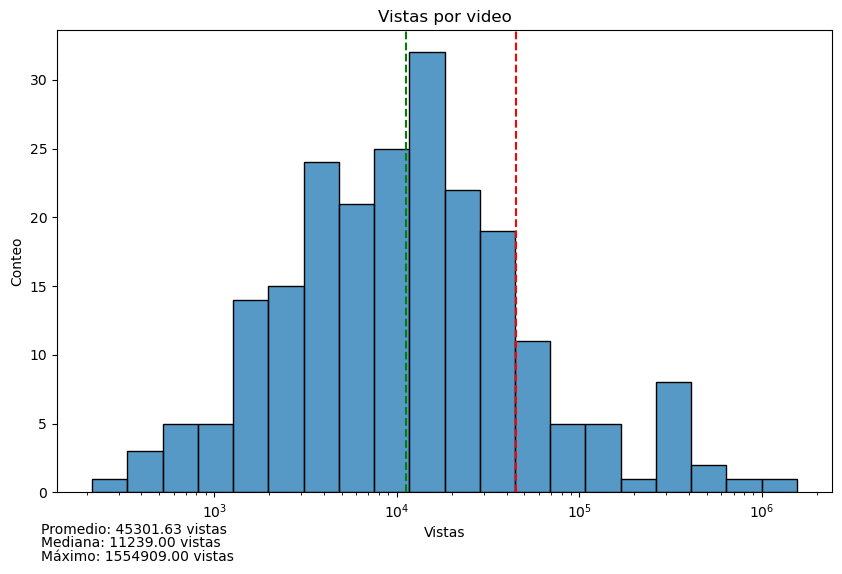

In [191]:
# distribution of views per video
plt.figure(figsize=(10,6))
sns.histplot(df_videos, x="view_count", log_scale=True, bins=20)

# add mean views
mean_views = df_videos.view_count.mean()
plt.axvline(mean_views, color='red', linestyle='--')

# add median views
median_views = df_videos.view_count.median()
plt.axvline(median_views, color='green', linestyle='--')

# annotate mean bottom left
plt.annotate(
    'Promedio: {:.2f} vistas'.format(mean_views),
    xy=(mean_views, 10), xytext=(median_views*0.01, -3)
)
# annotate median bottom left
plt.annotate(
    'Mediana: {:.2f} vistas'.format(median_views),
    xy=(median_views, 10), xytext=(median_views*0.01, -4)
)
# annotate median bottom left
plt.annotate(
    # format with comma separator for thousands'
    'Máximo: {:.2f} vistas'.format(df_videos.view_count.max()),
    xy=(df_videos.view_count.max(), 10), xytext=(median_views*0.01, -5)
)

# add title
plt.title('Vistas por video')
plt.xlabel('Vistas')
plt.ylabel('Conteo')

plt.show()

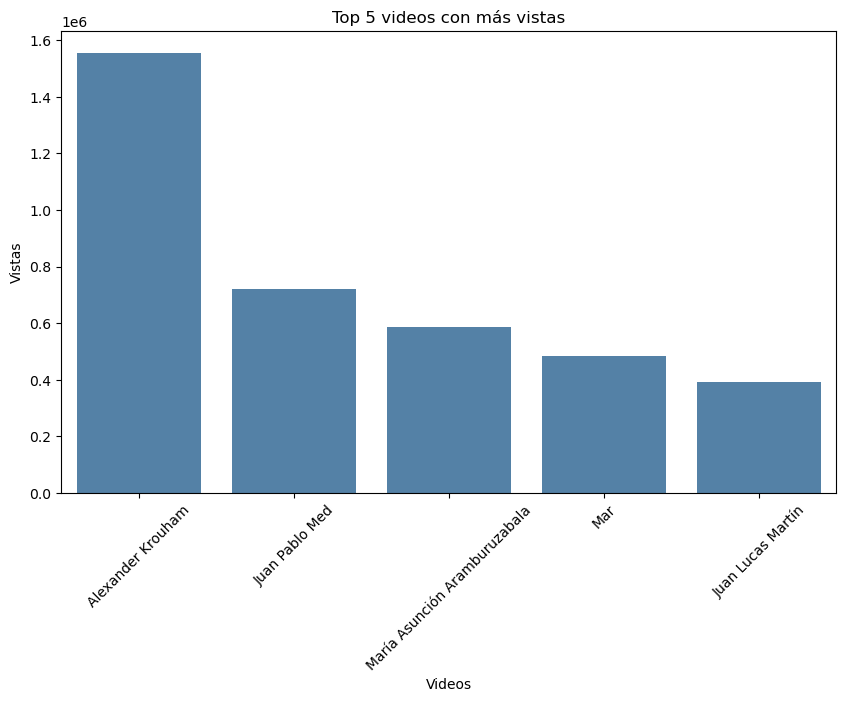

In [224]:
# views per video: top 5
top_5_videos = df_videos.sort_values(by='view_count', ascending=False).head(5)

# get words before '\bI\b' or '-'
top_5_videos['title'] = top_5_videos.title.str.extract(r'^\s*([^|]+?)\s*[|I-]', expand=False).str.strip().str.title()

# plt
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'sans-serif'
sns.barplot(x='title', y='view_count', data=top_5_videos, color='steelblue')

# add title
plt.title('Top 5 videos con más vistas')

# x label
plt.xlabel('Videos')
# rotate x labels
plt.xticks(rotation=45)

# y label
plt.ylabel('Vistas')

plt.show()


## Transcripts

### Words by video

In [231]:
# num of videos with transcripts
videos_id_transcript_unique = len(df_videos_transcripts.video_id.unique())
print(f"Videos with transcripts: {videos_id_transcript_unique}")

Videos with transcripts: 216


In [233]:
# train/test
print(f"Num train videos {np.round(videos_id_transcript_unique * 0.8)}")
print(f"Num test videos {np.round(videos_id_transcript_unique * 0.2)}")

Num train videos 173.0
Num test videos 43.0


In [240]:
# get the nomber of words per group for a series
def get_num_words(series):
    # get the number of words per text
    num_words = series.str.split().str.len()
    # get the mean
    mean_num_words = np.sum(np.asarray(num_words))
    return mean_num_words


# get the number of words per video_id
df_num_words = (
    df_videos_transcripts
    .groupby('video_id', as_index=False)
    .agg(
        num_words=('text', get_num_words)
    )
)
df_num_words

,video_id,num_words
0,-YRtEVjpDNU,17392
1,027NOppIrVQ,15666
2,0TES4qjR-gk,16432
3,0wyA0NDJVl8,12763
4,0xuLFU1BTsM,16548
...,...,...
211,yq2hHtOOM8U,15008
212,ywX0p5km9d8,21025
213,z4VnpVI8SlE,22878
214,zfrw7ONv7xw,8579


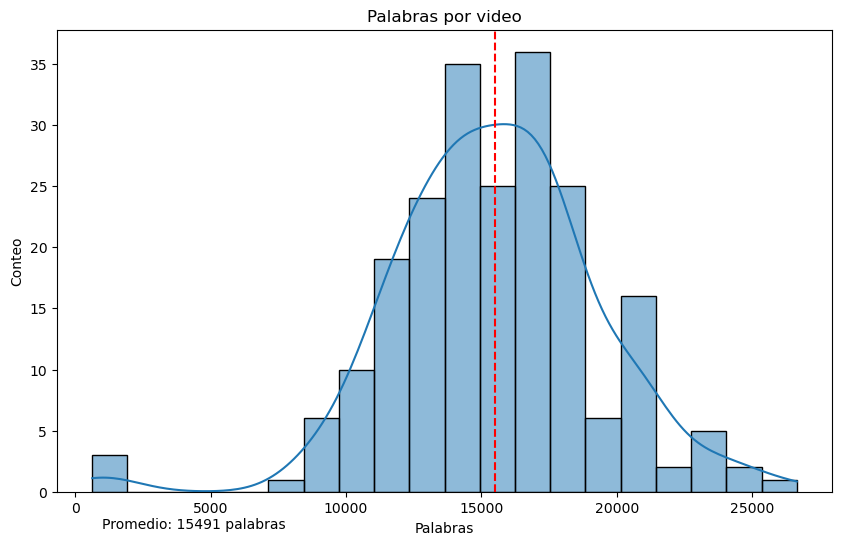

In [245]:
# histogram of number of words per video
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_num_words,
    x='num_words',
    kde=True,
    bins=20
)

# add mean number of words
mean_num_words = df_num_words.num_words.mean()
plt.axvline(mean_num_words, color='red', linestyle='--')

# annotate mean duration bottom left
plt.annotate(
    'Promedio: {:.0f} palabras'.format(mean_num_words),
    xy=(mean_num_words, 10), xytext=(1000, -3)
)

# add title
plt.title('Palabras por video')
plt.xlabel('Palabras')
plt.ylabel('Conteo')

plt.show()

In [253]:
# total number of words
print(f"Total number of words: {df_num_words.num_words.sum()}")

Total number of words: 3346083


### Words by description

In [247]:
# get the number of words per video_id
df_num_words_description = (
    df_videos
    .groupby('id', as_index=False)
    .agg(
        num_words=('description', get_num_words)
    )
)
df_num_words_description

,id,num_words
0,-YRtEVjpDNU,227
1,027NOppIrVQ,656
2,0TES4qjR-gk,289
3,0wyA0NDJVl8,203
4,0xuLFU1BTsM,651
...,...,...
215,yq2hHtOOM8U,212
216,ywX0p5km9d8,680
217,z4VnpVI8SlE,695
218,zfrw7ONv7xw,543


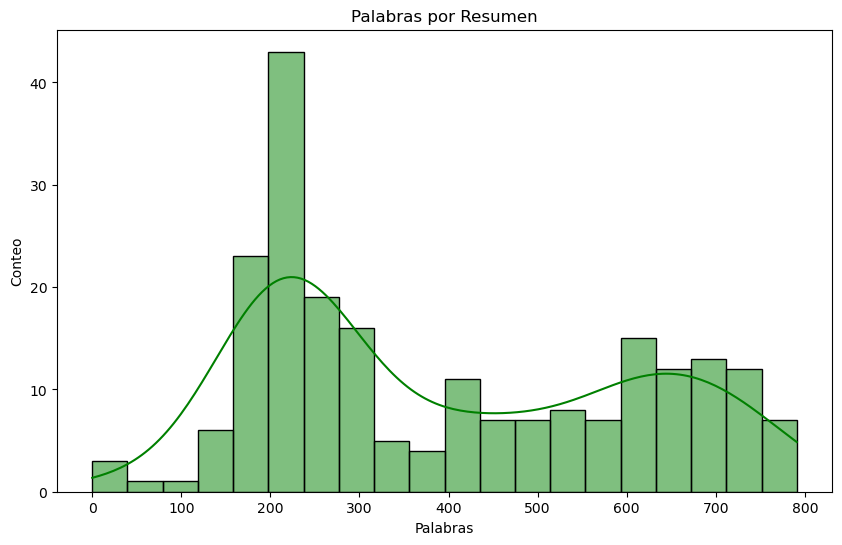

In [261]:
# histogram of number of words per video
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_num_words_description,
    x='num_words',
    kde=True,
    color='green',
    bins=20
)

# # add mean number of words
# mean_num_words = df_num_words_description.num_words.mean()
# plt.axvline(mean_num_words, color='red', linestyle='--')

# # annotate mean duration bottom left
# plt.annotate(
#     'Promedio: {:.0f} palabras'.format(mean_num_words),
#     xy=(mean_num_words, 10), xytext=(10, -4)
# )

# add title
plt.title('Palabras por Resumen')
plt.xlabel('Palabras')
plt.ylabel('Conteo')

plt.show()

In [254]:
# total number of words
print(f"Total number of words: {df_num_words_description.num_words.sum()}")

Total number of words: 86830


## Example (Jorge Combe)

In [263]:
# search for chapter wit "jorge combe" in the title
df_jorge = df_videos.query("title.str.contains('Combe')", engine='python')
df_jorge

,id,title,description,published_at,playlist_id,channel_id,photo_url,tags,view_count,like_count,comment_count,mins_duration,likes_per_view
1,QeGMG8W9pS4,"Jorge Combe. DD3 - El Metaverso, SPACS, Ayuno ...",Entrevista al emprendedor mexicano Jorge Combe...,2021-10-08 16:38:40+00:00,PL5EDqo-XIoDCKGXn7vN0k1BcZu_n3onzV,UCWVspRnU4QdsR4Av4tDWWRw,https://i.ytimg.com/vi/QeGMG8W9pS4/maxresdefau...,"[Negocios, Desarrollo inmobiliario, Inversione...",30742.0,821,70,135.866667,0.026706


In [265]:
# look for the description of the video
print(df_jorge.description.iloc[0])

Entrevista al emprendedor mexicano Jorge Combe, experto en fondos de inversión y en SPACS.

“Haz, H A Z, nada más, no necesitas nada más, HAZ.” – Jorge Combe

Este episodio es presentado por Tribal Credit, la tarjeta de crédito corporativa para empresas de alto impacto.

Jorge Combe, puedes encontrarlo en twitter como @jorgecombe, es un emprendedor mexicano, co-fundador de DD3 Capital Partners un operador de fondos de inversión y activos alternativos enfocado en deuda privada.  

Previo a DD3, Jorge fue MD en Goldman Sachs, donde trabajó por 7 años y llegó a ser responsable del área de Real Estate para toda Latinoamérica así como co-Head para Banca de Inversión en México.

Dentro de los logros de DD3, está tener uno de los 3 SPACs con mejor desempeño de todos los tiempos del Nasdaq y el fintech hipotecario DD360: una plataforma disruptiva enfocada en el financiamiento a desarrolladores inmobiliarios y créditos a individuos que quieran comprar vivienda con el uso de tecnología e intelig

In [271]:
# num of words
num_words_combe = df_num_words[df_num_words.video_id.isin(df_jorge.id)].num_words.sum()
print(f"Num of words: {num_words_combe}")

Num of words: 26640


In [269]:
num_words_combe

0      False
1      False
2      False
3      False
4      False
       ...  
211    False
212    False
213    False
214    False
215    False
Name: video_id, Length: 216, dtype: bool

In [273]:
# num of words
num_words_combe = df_num_words_description[df_num_words_description.id.isin(df_jorge.id)].num_words.sum()
print(f"Num of words: {num_words_combe}")

Num of words: 243


In [275]:
# some text from combe
df_videos_transcripts_combe = df_videos_transcripts.query("video_id in @df_jorge.id")
df_videos_transcripts_combe

,timestamp,text,video_id
191185,0:05,toluca pagar ese tipo de gastos me ponen mal y...,QeGMG8W9pS4
191186,0:12,la gente no le da valor y no es porque sea yo ...,QeGMG8W9pS4
191187,0:18,voy con alguien yo le invito a la comida no no...,QeGMG8W9pS4
191188,0:24,consentir la gente me encanta no es de que est...,QeGMG8W9pS4
191189,0:30,que ver con la apreciación de lo que es el din...,QeGMG8W9pS4
...,...,...,...
192508,2:15:18,minus leer viernes de cracks que es un correo ...,QeGMG8W9pS4
192509,2:15:23,gadgets frases o cosas que encuentro en intern...,QeGMG8W9pS4
192510,2:15:30,al menos a empezar una conversación más intere...,QeGMG8W9pS4
192511,2:15:37,si quieres ser una de ellas puedes registrarte...,QeGMG8W9pS4


In [277]:
# join all the text from combe
text = " ".join(text for text in df_videos_transcripts_combe.text)
print(text)

toluca pagar ese tipo de gastos me ponen mal y el pie y es que el problema es que la gente no le da valor y no es porque sea yo como por la gente que me conoce te va a decir el 80% de las veces que voy con alguien yo le invito a la comida no no no es el dinero o sea por qué y me encanta invitar a la gente le encanta consentir la gente me encanta no es de que estoy guardando el último porque me quiero ver si puedo ahorrar y morirme rico no tiene nada que ver con eso tiene que ver con la apreciación de lo que es el dinero el que yo creo que cada vez menos gente lo tiene en donde se ha vuelto tan automático y tan fácil algunas cosas spotify lo con lo contacto amazon prime lo contacto en la tarjeta del día paso de yaveo de cualquier está pegada no sé en cuánto me cobran me lo cobran contra la tarjeta la gente olvide estos pequeños y como dice el dicho en los y pues los sentados los pisos los pesos se cuidan solos [Música] [Música] hola y bienvenidos a un nuevo episodio de cracks podcast yo